In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from wrangle_exercises import *

In [3]:
df = data('iris')

In [4]:
new_col_names = []

for col in df.columns:
    new_col_names.append(col.lower().replace('.', '_'))
    
df.columns = new_col_names

X = df[['petal_length', 'petal_width']]

In [5]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

clusters = kmeans.predict(X)

df['cluster'] = clusters

df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,cluster
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.00
versicolor,5.936,2.770,4.260,1.326,1.96
virginica,6.588,2.974,5.552,2.026,1.08


[Text(0.5, 1.0, 'K-Means Clusters')]

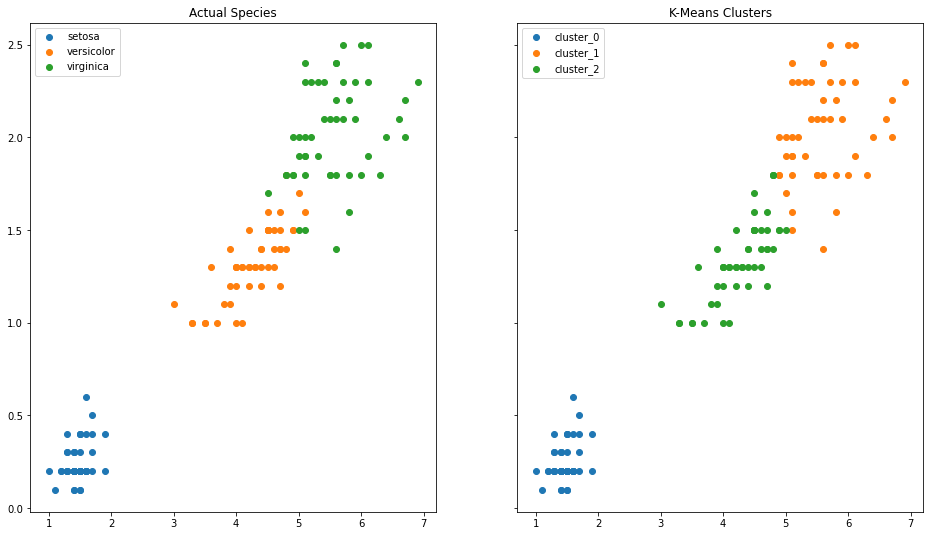

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(16, 9), sharex=True, sharey=True)

for species, subset in df.groupby('species'):
    ax[0].scatter(subset.petal_length, subset.petal_width, label=species)
    
ax[0].legend()
ax[0].set(title='Actual Species')
    
for cluster_n in df.cluster.sort_values().unique():
    ax[1].scatter(df[df.cluster == cluster_n].petal_length, df[df.cluster == cluster_n].petal_width, label=f'cluster_{cluster_n}')

ax[1].legend()
ax[1].set(title="K-Means Clusters")

Text(0.5, 1.0, 'Change in inertia as k increases')

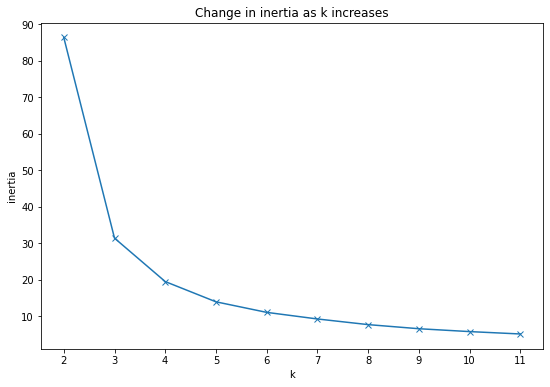

In [8]:
plt.figure(figsize=(9, 6))
pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
plt.xticks(range(2, 12))
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('Change in inertia as k increases')
